In [1]:
import pandas.plotting
import sklearn
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./AppleStore.csv')

In [3]:
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
numeric_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    'cont_rating'
]

categorial_cols = [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

In [5]:
cols = numeric_cols + categorial_cols + [target_col]

In [6]:
data = data[cols]

In [7]:
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4+,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4+,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4+,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12+,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4+,USD,Reference,4.5


In [8]:
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)

In [9]:
data['cont_rating'].dtype

dtype('int32')

In [10]:
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
cont_rating         0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [11]:
for col in categorial_cols:
    print(f"{col}       DISTRIBUTION")
    print(data[col].value_counts())
    print()

currency       DISTRIBUTION
USD    7197
Name: currency, dtype: int64

prime_genre       DISTRIBUTION
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [12]:
data.drop(columns=['currency'], inplace=True)
cols.remove('currency')
categorial_cols.remove('currency')

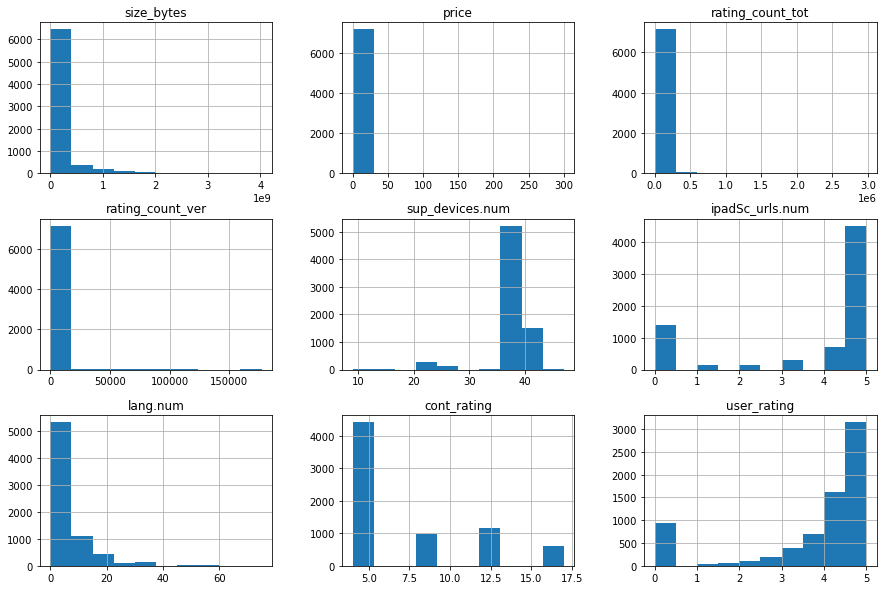

In [13]:
data.hist(column=cols, figsize=(15, 10));

In [14]:
data.corr().style.background_gradient(cmap='RdBu_r').set_precision(2)

C:\Users\peter\AppData\Local\Temp/ipykernel_28040/2779169366.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='RdBu_r').set_precision(2)


,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating
size_bytes,1.00,0.18,0.00,0.01,-0.12,0.15,0.00,0.14,0.07
price,0.18,1.00,-0.04,-0.02,-0.12,0.07,-0.01,-0.03,0.05
rating_count_tot,0.00,-0.04,1.00,0.16,0.01,0.02,0.14,0.01,0.08
rating_count_ver,0.01,-0.02,0.16,1.00,0.04,0.02,0.01,0.00,0.07
sup_devices.num,-0.12,-0.12,0.01,0.04,1.00,-0.04,-0.04,0.02,-0.04
ipadSc_urls.num,0.15,0.07,0.02,0.02,-0.04,1.00,0.09,-0.11,0.27
lang.num,0.00,-0.01,0.14,0.01,-0.04,0.09,1.00,-0.07,0.17
cont_rating,0.14,-0.03,0.01,0.00,0.02,-0.11,-0.07,1.00,-0.10
user_rating,0.07,0.05,0.08,0.07,-0.04,0.27,0.17,-0.10,1.00


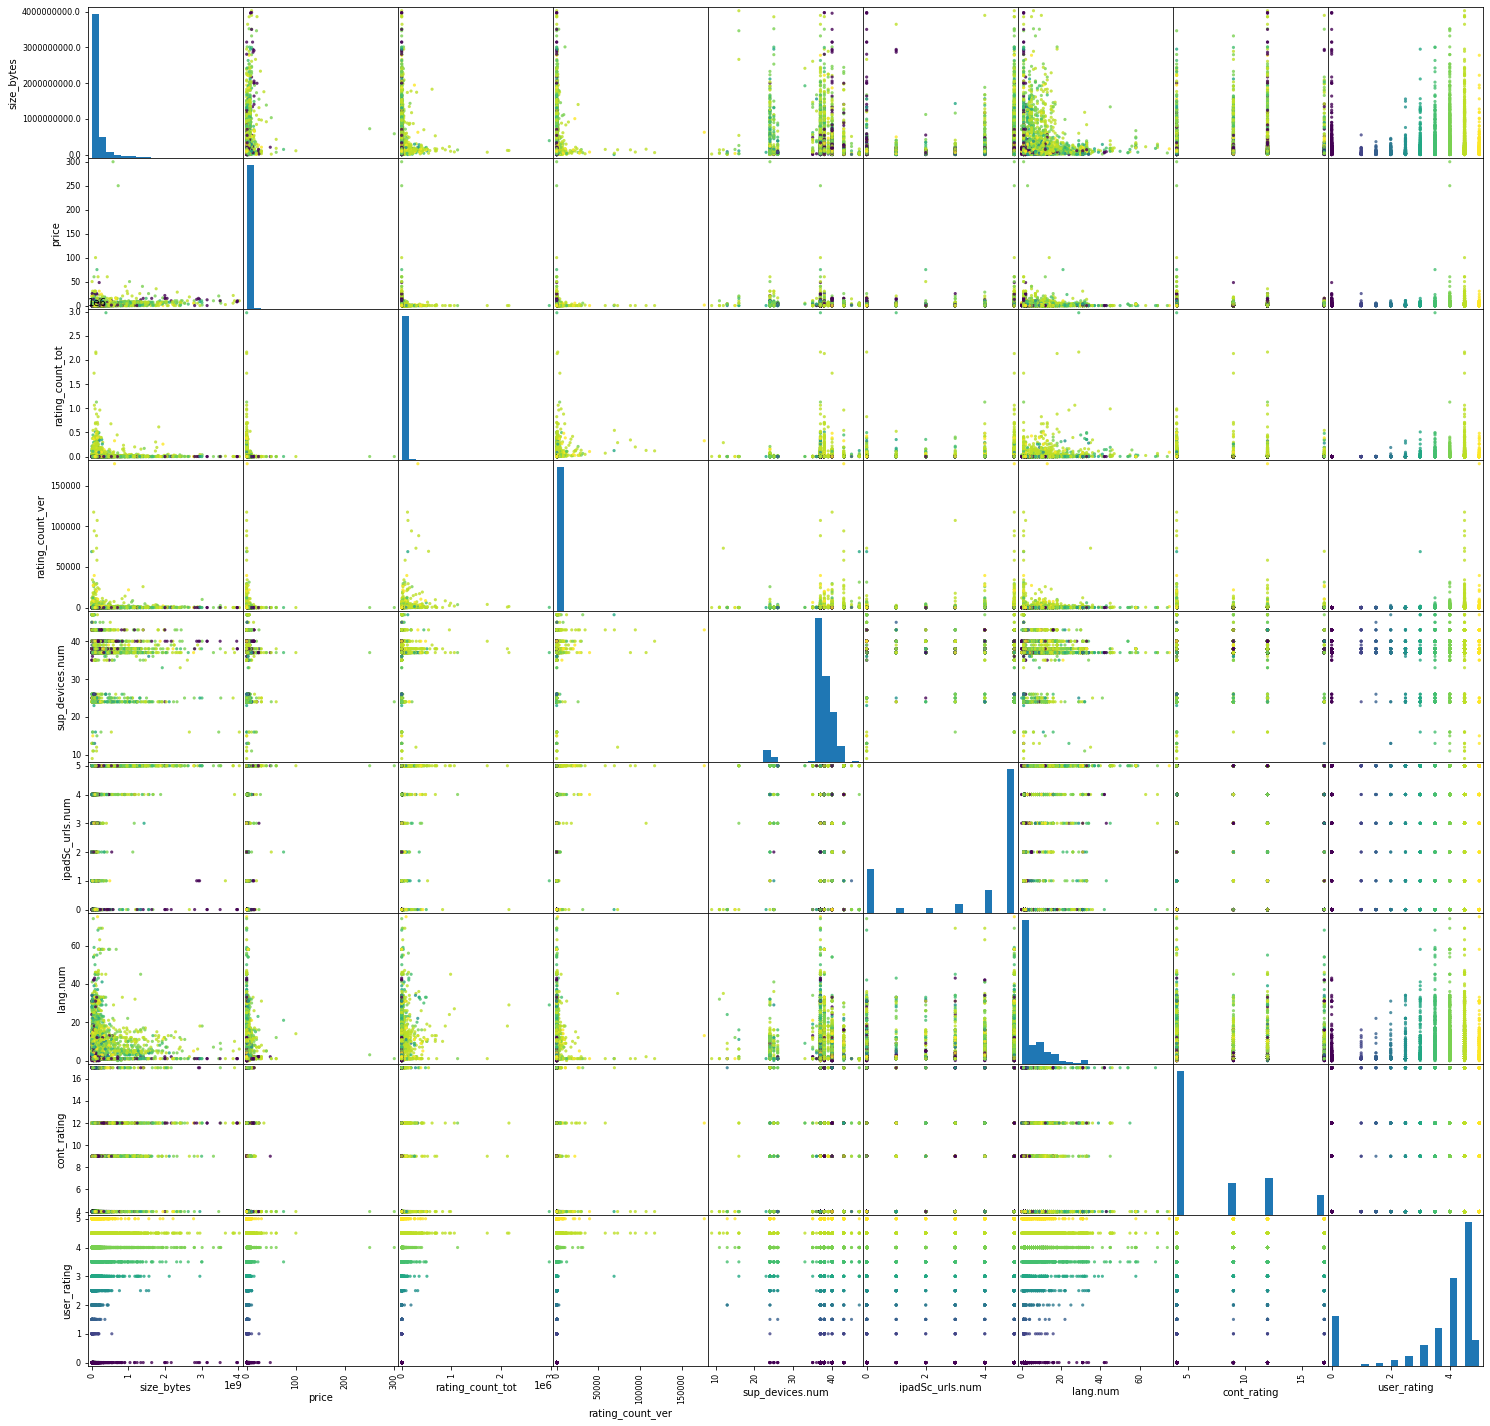

In [15]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(25, 25), marker='o', hist_kwds={'bins' : 20}, s=10, alpha=.8);

In [16]:
data['is_free'] = data['price'] == 0
categorial_cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,user_rating,is_free
0,100788224,3.99,21292,26,38,5,10,4,Games,4.0,False
1,158578688,0.00,161065,26,37,5,23,4,Productivity,4.0,True
2,100524032,0.00,188583,2822,37,5,3,4,Weather,3.5,True
3,128512000,0.00,262241,649,37,5,9,12,Shopping,4.0,True
4,92774400,0.00,985920,5320,37,5,45,4,Reference,4.5,True


In [17]:
data = pd.get_dummies(data, columns=categorial_cols)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating,prime_genre_Book,...,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,is_free_False,is_free_True
0,100788224,3.99,21292,26,38,5,10,4,4.0,0,...,0,0,0,0,0,0,0,0,1,0
1,158578688,0.00,161065,26,37,5,23,4,4.0,0,...,1,0,0,0,0,0,0,0,0,1
2,100524032,0.00,188583,2822,37,5,3,4,3.5,0,...,0,0,0,0,0,0,0,1,0,1
3,128512000,0.00,262241,649,37,5,9,12,4.0,0,...,0,0,1,0,0,0,0,0,0,1
4,92774400,0.00,985920,5320,37,5,45,4,4.5,0,...,0,1,0,0,0,0,0,0,0,1


In [18]:
categorial_cols_new = []
for col_name in categorial_cols:
    categorial_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
categorial_cols = categorial_cols_new

In [19]:
categorial_cols

['prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather',
 'is_free_False',
 'is_free_True']

In [20]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[numeric_cols + categorial_cols])
X = pca.transform(data[numeric_cols + categorial_cols])

X = pca.fit_transform(data[numeric_cols + categorial_cols])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [24]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [25]:
lr = LinearRegression()

lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -4.669291231986341
MSE: 2.041645045425692


In [26]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

print_metrics(knn.predict(X_test), y_test)

R^2: -1.2412037571677104
MSE: 2.0366666666666666


In [27]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate

In [28]:
cross_validate(LinearRegression(), X, data[target_col], cv=5, scoring={
    'r2_score': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error)
})

{'fit_time': array([0.00500154, 0.00399542, 0.00300312, 0.00300217, 0.00299954]),
 'score_time': array([0.00100398, 0.        , 0.00099659, 0.00100017, 0.00099993]),
 'test_r2_score': array([-0.8388951 ,  0.06415685,  0.11576646,  0.11021563,  0.07105933]),
 'test_mse': array([1.67334843, 1.49086356, 1.94034258, 2.81661958, 2.93204452])}

In [29]:
cross_validate(KNeighborsRegressor(), X, data[target_col], cv=5, scoring={
    'r2_score': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error)
})

{'fit_time': array([0.0030005 , 0.00100064, 0.00199962, 0.00200009, 0.00200009]),
 'score_time': array([0.16099787, 0.15099931, 0.15600181, 0.14499998, 0.14299941]),
 'test_r2_score': array([-0.59746466, -0.00837802,  0.0274914 ,  0.19082863,  0.0752518 ]),
 'test_mse': array([1.45365278, 1.60641667, 2.13405142, 2.5614385 , 2.91881167])}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
gbr_grid_search = GridSearchCV(KNeighborsRegressor(),
                               [{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
                               cv=5,
                               error_score=make_scorer(mean_squared_error),
                               verbose=10)

gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


ValueError: error_score must be the string 'raise' or a numeric value. (Hint: if using 'raise', please make sure that it has been spelled correctly.)